<a href="https://colab.research.google.com/github/Sahil-Jagadale/ML_PRACTICALS/blob/main/Problem_Statement_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [13]:
data = pd.read_csv("NaiveBayes.csv")
data.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
data.shape

(400, 3)

In [8]:
data.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [15]:
x = data[['Age','Salary']]
y = data['Purchased']

In [11]:
nb_classifier = GaussianNB()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [18]:
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [19]:
y_pred = nb_classifier.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(f'Accuracy: {accuracy}')
print("Confusion matrix:- ")
print(cm)
print("Classification Report:- ")
print(cr)

Accuracy: 0.9125
Confusion matrix:- 
[[48  4]
 [ 3 25]]
Classification Report:- 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



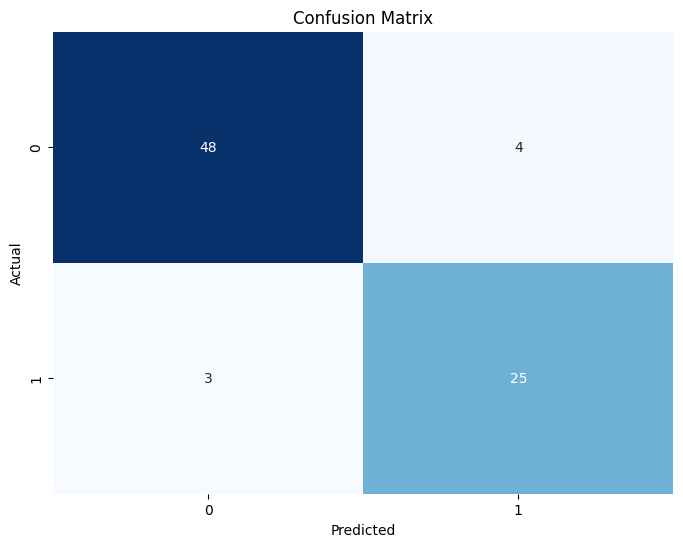

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
y_prob = nb_classifier.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(fpr,tpr)

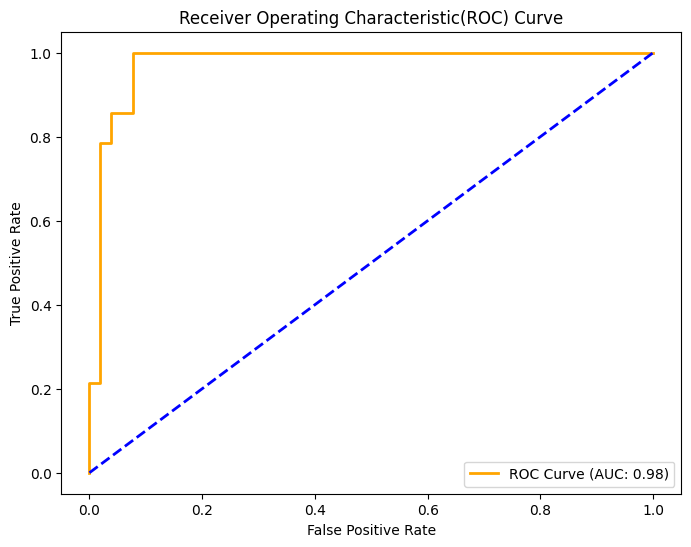

In [34]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, color="Orange", lw=2, label=f'ROC Curve (AUC: {roc_auc:.2f})')
plt.plot([0,1],[0,1], color="Blue", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()